In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
import numpy as np
import plotly.graph_objects as go
import spacy
import nltk
warnings.filterwarnings('ignore')

In [146]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
df1 = pd.read_csv('/content/drive/MyDrive/Sample 2_Airbnb_listings.csv')
df_listings=pd.DataFrame(df1,columns=['id','accommodates','price','amenities','neighbourhood_cleansed','review_scores_rating'])
def format_price(colnm):
  return int(float(colnm.replace('$','').replace(',','')))
df_listings['price']=df_listings['price'].apply(format_price)
df_listings.head()

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating
0,43920083,5,128,"[""Board games"", ""Kitchen"", ""Baby bath"", ""Dishw...",Lambeth,100.0
1,15262253,1,70,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...",Westminster,91.0
2,392246,2,39,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...",Greenwich,99.0
3,30054179,3,85,"[""TV"", ""Essentials"", ""Kitchen"", ""Free parking ...",Lambeth,NaN
4,29098736,1,40,"[""Washer \u2013\u00a0In unit"", ""Bed linens"", ""...",Wandsworth,100.0


In [194]:
y=df_listings[df_listings['id']==14300858]
y

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating,amenities_list,amen_as_list
10749,14300858,4,67,"[""Kitchen"", ""Bed linens"", ""Hangers"", ""Smart lo...",Kensington and Chelsea,89.0,"[Kitchen, Bed linens, Hangers, Smart lock, Fir...","[Kitchen, Bed linens, Hangers, Smart lock, Fir..."


In [133]:
df_listings.shape

(30000, 6)

In [134]:
df_listings['neighbourhood_cleansed']

0                       Lambeth
1                   Westminster
2                     Greenwich
3                       Lambeth
4                    Wandsworth
                  ...          
29995    Kensington and Chelsea
29996                 Southwark
29997                    Ealing
29998    Kensington and Chelsea
29999                   Hackney
Name: neighbourhood_cleansed, Length: 30000, dtype: object

In [135]:
df_listings.dtypes

id                          int64
accommodates                int64
price                       int64
amenities                  object
neighbourhood_cleansed     object
review_scores_rating      float64
dtype: object

In [136]:
df_listings.isnull().sum()
df_listings= df_listings.fillna(0)


In [163]:
amen = df_listings['amenities'].unique()
import ast
def Lis(x):
    arr = ast.literal_eval(x)
    return arr

Lis("['Hello']")

df_listings['amen_as_list'] = df_listings['amenities'].apply(Lis)
df_listings['amen_as_list']
amenities = {}

for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if(df_listings['amen_as_list'][i][j] not in amenities):
            amenities[(df_listings['amen_as_list'][i][j])] = 1
        else:
            amenities[(df_listings['amen_as_list'][i][j])] += 1
amenities

{'Kitchen': 154,
 'Bed linens': 79,
 'Hangers': 162,
 'Long term stays allowed': 163,
 'Wifi': 178,
 'Carbon monoxide alarm': 94,
 'Heating': 174,
 'Essentials': 177,
 'Washer': 138,
 'Hair dryer': 154,
 'First aid kit': 48,
 'Dedicated workspace': 136,
 'Refrigerator': 81,
 'Iron': 149,
 'Extra pillows and blankets': 39,
 'Cooking basics': 93,
 'Coffee maker': 44,
 'Oven': 70,
 'Shampoo': 135,
 'Hot water': 118,
 'Dishes and silverware': 85,
 'Stove': 71,
 'TV': 118,
 'Smoke alarm': 163,
 'Lockbox': 30,
 'Dryer': 87,
 'Host greets you': 37,
 'Private entrance': 35,
 'Lock on bedroom door': 24,
 'Paid parking off premises': 41,
 'Elevator': 34,
 'Luggage dropoff allowed': 36,
 'Dishwasher': 32,
 'Microwave': 66,
 'TV with standard cable': 25,
 'Cable TV': 37,
 'Single level home': 16,
 'Patio or balcony': 19,
 'Fire extinguisher': 79,
 'Indoor fireplace': 12,
 'Security cameras on property': 19,
 'Portable fans': 3,
 'Shower gel': 14,
 'Free parking on premises': 2,
 'Nespresso machine

In [164]:
#new_dict = [(key, value) for value, key in amenities.items()]
#dict(new_dict)
new_amen = sorted(amenities.items(), key = lambda x: x[1])

In [165]:
new_amen[-25:]


[('First aid kit', 48),
 ('Microwave', 66),
 ('Oven', 70),
 ('Stove', 71),
 ('Bed linens', 79),
 ('Fire extinguisher', 79),
 ('Refrigerator', 81),
 ('Dishes and silverware', 85),
 ('Dryer', 87),
 ('Cooking basics', 93),
 ('Carbon monoxide alarm', 94),
 ('Hot water', 118),
 ('TV', 118),
 ('Shampoo', 135),
 ('Dedicated workspace', 136),
 ('Washer', 138),
 ('Iron', 149),
 ('Kitchen', 154),
 ('Hair dryer', 154),
 ('Hangers', 162),
 ('Long term stays allowed', 163),
 ('Smoke alarm', 163),
 ('Heating', 174),
 ('Essentials', 177),
 ('Wifi', 178)]

In [166]:
newDict = []
for i in range(15,25):
    newDict.append(new_amen[-50:][i][0])
newDict

['Lockbox',
 'Dishwasher',
 'Elevator',
 'Private entrance',
 'Luggage dropoff allowed',
 'Host greets you',
 'Cable TV',
 'Extra pillows and blankets',
 'Paid parking off premises',
 'Coffee maker']

In [167]:
dnew = pd.DataFrame()
dnew['scores'] = df_listings['review_scores_rating']
dnew=dnew.fillna(dnew.mean())
dnew

,scores
42,97.0
224,90.0
281,100.0
408,95.0
742,94.0
...,...
29494,100.0
29919,90.0
29944,93.0
29991,93.0


In [168]:
for i in newDict:
    dnew[i] = 0

dnew

,scores,Lockbox,Dishwasher,Elevator,Private entrance,Luggage dropoff allowed,Host greets you,Cable TV,Extra pillows and blankets,Paid parking off premises,Coffee maker
42,97.0,0,0,0,0,0,0,0,0,0,0
224,90.0,0,0,0,0,0,0,0,0,0,0
281,100.0,0,0,0,0,0,0,0,0,0,0
408,95.0,0,0,0,0,0,0,0,0,0,0
742,94.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29494,100.0,0,0,0,0,0,0,0,0,0,0
29919,90.0,0,0,0,0,0,0,0,0,0,0
29944,93.0,0,0,0,0,0,0,0,0,0,0
29991,93.0,0,0,0,0,0,0,0,0,0,0


In [169]:
for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if df_listings['amen_as_list'][i][j] in newDict:
            dnew[df_listings['amen_as_list'][i][j]][i] = 1

dnew

,scores,Lockbox,Dishwasher,Elevator,Private entrance,Luggage dropoff allowed,Host greets you,Cable TV,Extra pillows and blankets,Paid parking off premises,Coffee maker
42,97.0,0,0,0,0,0,0,0,1,0,1
224,90.0,1,0,0,0,0,0,0,0,0,0
281,100.0,0,0,1,1,1,1,0,0,1,0
408,95.0,0,1,0,0,0,1,1,0,1,1
742,94.0,1,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29494,100.0,0,0,0,0,0,0,1,0,0,0
29919,90.0,1,0,0,0,0,1,0,1,0,1
29944,93.0,0,0,0,1,1,0,0,1,1,0
29991,93.0,0,0,0,0,0,1,0,1,0,0


In [170]:
from sklearn.ensemble import ExtraTreesClassifier
etf = ExtraTreesClassifier()

X = dnew.drop(labels = ['scores'], axis = 1)
y = dnew['scores']

etf.fit(X, y)

ExtraTreesClassifier()

In [171]:
feature_importance = etf.feature_importances_
feature_importance

array([0.0773872 , 0.1085565 , 0.11665589, 0.11968142, 0.07522805,
       0.09095329, 0.11424136, 0.1027892 , 0.08765699, 0.10685011])

In [172]:
for i in range(10):
    feature_importance[i] = feature_importance[i]*100

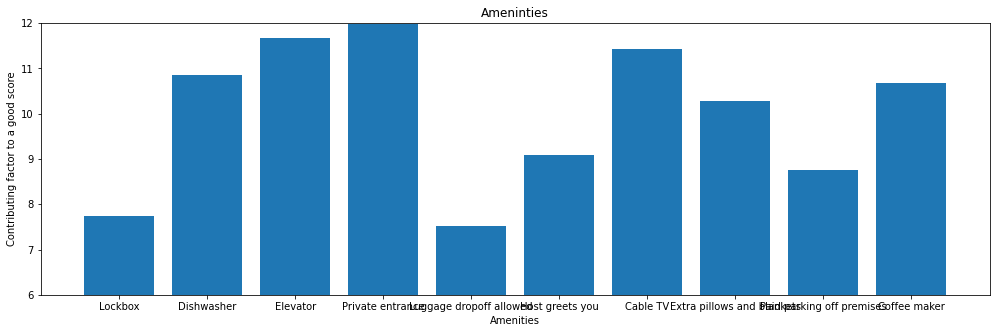

In [173]:
fig = plt.figure(figsize=(17, 5))
plt.ylim(6,12)
plt.bar(newDict, feature_importance)
plt.xlabel('Amenities')
plt.ylabel('Contributing factor to a good score')
plt.title('Ameninties')
plt.show()

In [174]:
#remove the NAN values 
df_listings.dropna(how='any',inplace=True)
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 42 to 29998
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      185 non-null    int64  
 1   accommodates            185 non-null    int64  
 2   price                   185 non-null    int64  
 3   amenities               185 non-null    object 
 4   neighbourhood_cleansed  185 non-null    object 
 5   review_scores_rating    185 non-null    float64
 6   amenities_list          185 non-null    object 
 7   amen_as_list            185 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 13.0+ KB


In [175]:
df_listings=df_listings[(df_listings['accommodates']<=4)]  
df_listings = df_listings[df_listings['neighbourhood_cleansed'].isin(['Kensington and Chelsea'])]
df_listings

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating,amenities_list,amen_as_list
42,38845362,2,61,"[""Kitchen"", ""Bed linens"", ""Hangers"", ""Long ter...",Kensington and Chelsea,97.0,"""[\""Kitchen\"", \""Bed linens\"", \""Hangers\"", \""...","[Kitchen, Bed linens, Hangers, Long term stays..."
224,35185970,2,65,"[""TV"", ""Essentials"", ""Kitchen"", ""Cooking basic...",Kensington and Chelsea,90.0,"""[\""TV\"", \""Essentials\"", \""Kitchen\"", \""Cooki...","[TV, Essentials, Kitchen, Cooking basics, Wash..."
281,13969012,2,73,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Pri...",Kensington and Chelsea,100.0,"""[\""Kitchen\"", \""Host greets you\"", \""Hangers\...","[Kitchen, Host greets you, Hangers, Private en..."
408,11289575,3,66,"[""Dishwasher"", ""Kitchen"", ""Host greets you"", ""...",Kensington and Chelsea,95.0,"""[\""Dishwasher\"", \""Kitchen\"", \""Host greets y...","[Dishwasher, Kitchen, Host greets you, Hangers..."
742,22848358,4,75,"[""Kitchen"", ""Bed linens"", ""Hangers"", ""Private ...",Kensington and Chelsea,94.0,"""[\""Kitchen\"", \""Bed linens\"", \""Hangers\"", \""...","[Kitchen, Bed linens, Hangers, Private entranc..."
...,...,...,...,...,...,...,...,...
29494,7571410,2,70,"[""Essentials"", ""Kitchen"", ""Washer"", ""Shampoo"",...",Kensington and Chelsea,100.0,"""[\""Essentials\"", \""Kitchen\"", \""Washer\"", \""S...","[Essentials, Kitchen, Washer, Shampoo, Cable T..."
29919,21018261,2,71,"[""Kitchen"", ""Host greets you"", ""Bed linens"", ""...",Kensington and Chelsea,90.0,"""[\""Kitchen\"", \""Host greets you\"", \""Bed line...","[Kitchen, Host greets you, Bed linens, Hangers..."
29944,41658339,4,75,"[""Kitchen"", ""Bed linens"", ""Hangers"", ""Private ...",Kensington and Chelsea,93.0,"""[\""Kitchen\"", \""Bed linens\"", \""Hangers\"", \""...","[Kitchen, Bed linens, Hangers, Private entranc..."
29991,887283,2,80,"[""Kitchen"", ""Host greets you"", ""Bed linens"", ""...",Kensington and Chelsea,93.0,"""[\""Kitchen\"", \""Host greets you\"", \""Bed line...","[Kitchen, Host greets you, Bed linens, Hangers..."


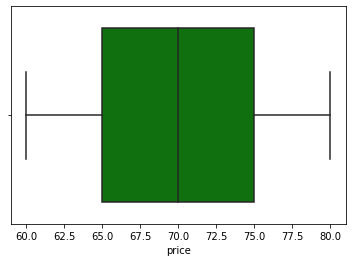

In [176]:
boxplot = sns.boxplot(x='price',data=df_listings,color='green')

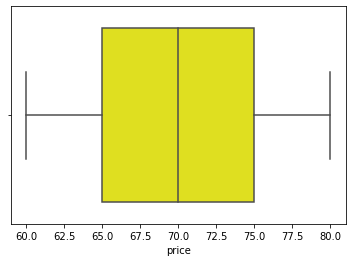

In [177]:

df_listings_boxplot = df_listings[df_listings['price'] <=120]

boxplot2 = sns.boxplot(x='price', data=df_listings_boxplot, color='yellow')


In [178]:
df_listings=df_listings[df_listings['price'].between(65,75)]
df_listings.shape[0]

108

In [179]:
import json
df_listings['amenities_list'] = df_listings['amenities'].apply(lambda y: json.dumps(y))
df_listings[['amenities','amenities_list']].head()


,amenities,amenities_list
224,"[""TV"", ""Essentials"", ""Kitchen"", ""Cooking basic...","""[\""TV\"", \""Essentials\"", \""Kitchen\"", \""Cooki..."
281,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Pri...","""[\""Kitchen\"", \""Host greets you\"", \""Hangers\..."
408,"[""Dishwasher"", ""Kitchen"", ""Host greets you"", ""...","""[\""Dishwasher\"", \""Kitchen\"", \""Host greets y..."
742,"[""Kitchen"", ""Bed linens"", ""Hangers"", ""Private ...","""[\""Kitchen\"", \""Bed linens\"", \""Hangers\"", \""..."
796,"[""TV"", ""Essentials"", ""Kitchen"", ""Paid parking ...","""[\""TV\"", \""Essentials\"", \""Kitchen\"", \""Paid ..."


In [180]:
import json

def parse_amenities(amenities_json):
    amenities = json.loads(amenities_json)
    return amenities

df_listings['amenities_list'] = df_listings['amenities'].apply(parse_amenities)
df_listings[['amenities', 'amenities_list']].head()


,amenities,amenities_list
224,"[""TV"", ""Essentials"", ""Kitchen"", ""Cooking basic...","[TV, Essentials, Kitchen, Cooking basics, Wash..."
281,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Pri...","[Kitchen, Host greets you, Hangers, Private en..."
408,"[""Dishwasher"", ""Kitchen"", ""Host greets you"", ""...","[Dishwasher, Kitchen, Host greets you, Hangers..."
742,"[""Kitchen"", ""Bed linens"", ""Hangers"", ""Private ...","[Kitchen, Bed linens, Hangers, Private entranc..."
796,"[""TV"", ""Essentials"", ""Kitchen"", ""Paid parking ...","[TV, Essentials, Kitchen, Paid parking off pre..."


In [182]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
amenities_binary=mlb.fit_transform(df_listings['amen_as_list'])
amenities_binary

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [183]:
x_data=pd.DataFrame(amenities_binary , columns=mlb.classes_,index=df_listings.id)
x_data.head()

,Air conditioning,BBQ grill,Baby monitor,Babysitter recommendations,Backyard,Baking sheet,Bathtub,Bed linens,Body soap,Breakfast,...,Smart lock,Smoke alarm,Stove,TV,TV with Netflix,TV with standard cable,Table corner guards,Washer,Wifi,Window guards
id,,,,,,,,,,,,,,,,,,,,,
35185970,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
13969012,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
11289575,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0
22848358,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,1,0
18806249,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0


In [184]:
x_final=x_data[x_data.columns[x_data.sum()>x_data.sum().mean()]]
df_amenities=pd.DataFrame(x_final.sum())
df_amenities.columns=['counts']
from sklearn.cluster import KMeans
s=KMeans(n_clusters=4).fit_predict(df_amenities['counts'].values.reshape(-1,1))
df_amenities['availability_cluster']=s
df_amenities=df_amenities.sort_values(by=['availability_cluster','counts'],ascending=False)
df_amenities


,counts,availability_cluster
Cooking basics,57,3
Carbon monoxide alarm,56,3
Dryer,55,3
Dishes and silverware,53,3
Refrigerator,49,3
Bed linens,46,3
Fire extinguisher,44,3
Stove,43,3
Washer,82,2
Dedicated workspace,79,2


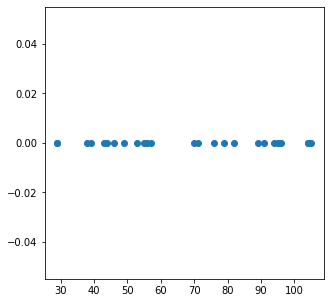

In [185]:
plt.figure(figsize=(5,5))
plt.scatter(df_amenities['counts'], np.zeros(df_amenities.shape[0]))
plt.show()


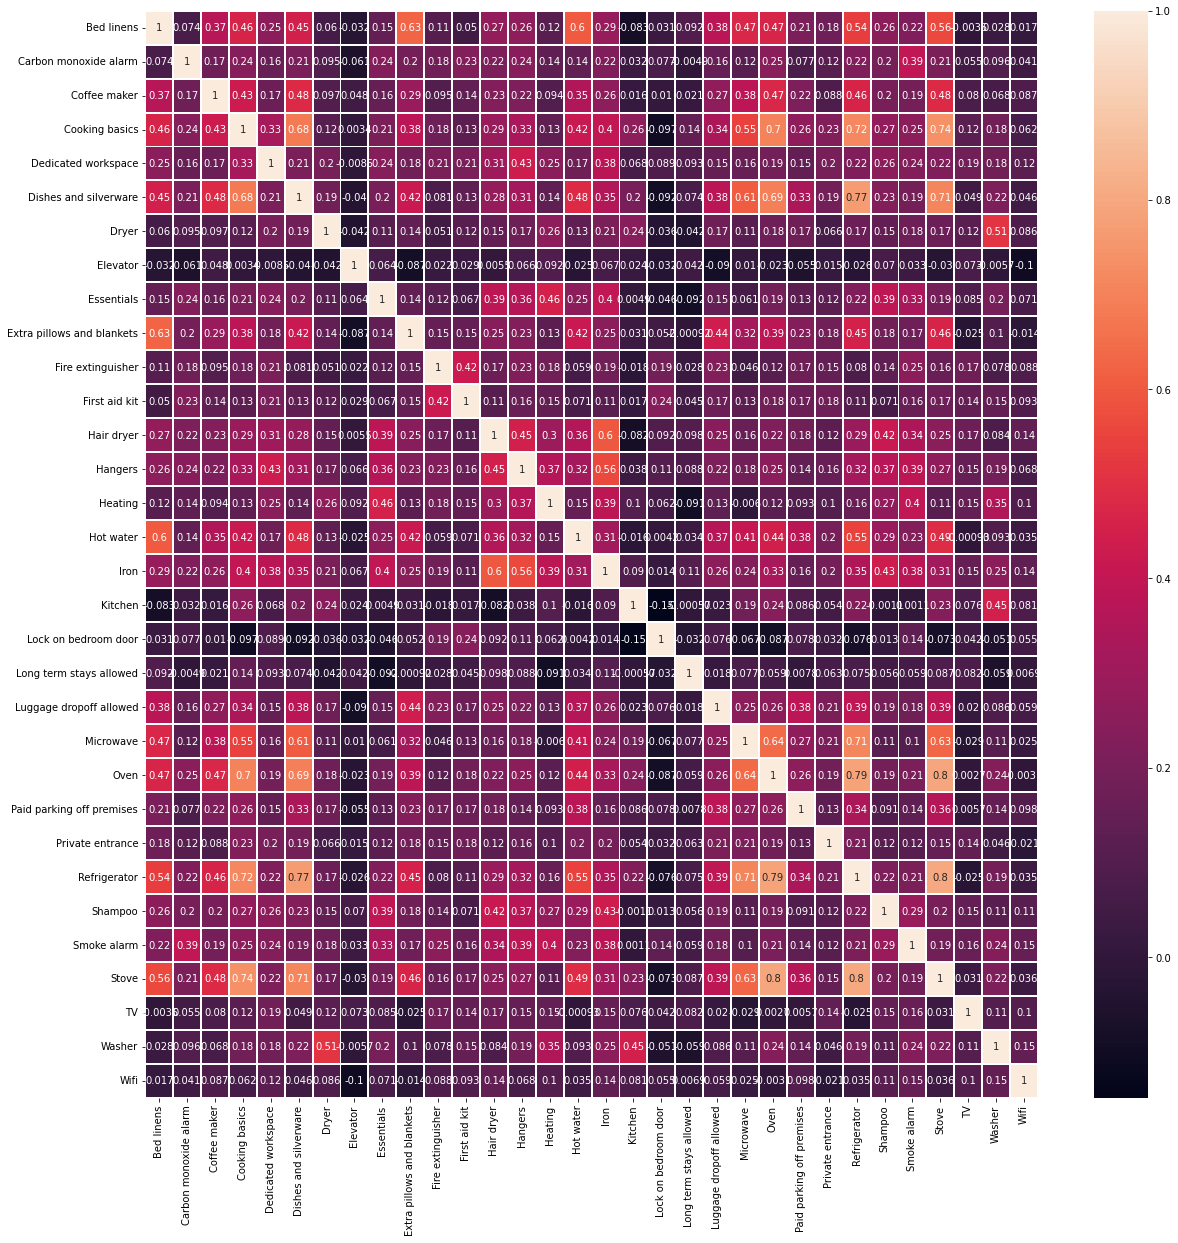

In [126]:
corr=x_final.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths=1)
plt.show()

In [192]:
xx=x_final.copy()
xx['lessential_amen']=xx['Oven']+xx['Microwave']+xx['Paid parking off premises']+xx['First aid kit']
xx['2common_amen']=xx['Shampoo']+xx['Dedicated workspace']+xx['Washer']+xx['TV']
xx['3upgraded_amen']=xx['Refrigerator']+xx['Dishes and silverware']+xx['Cooking basics']+xx['Stove']+xx['Dryer']+xx['Fire extinguisher']+xx['Carbon monoxide alarm']
xx['4other_amen']=+xx['Long term stays allowed']+xx['Essentials']+xx['Smoke alarm']+xx['Wifi']+xx['Iron']+xx['Kitchen']
cols=['lessential_amen','2common_amen','3upgraded_amen','4other_amen']
x_reduce=pd.DataFrame(xx,columns=cols)
x_reduce.head()




,lessential_amen,2common_amen,3upgraded_amen,4other_amen
id,,,,
35185970,0,4,3,6
13969012,2,4,2,6
11289575,3,2,6,6
22848358,1,2,4,4
18806249,1,2,2,6


        lessential_amen 2common_amen 3upgraded_amen 4other_amen
                   mean         mean           mean        mean
cluster                                                        
0              2.160000      3.10000       5.500000    5.660000
1              0.465517      2.62069       1.413793    5.068966
          id  lessential_amen  2common_amen  3upgraded_amen  4other_amen  \
34  14300858                1             3               6            6   

    cluster  
34        0  


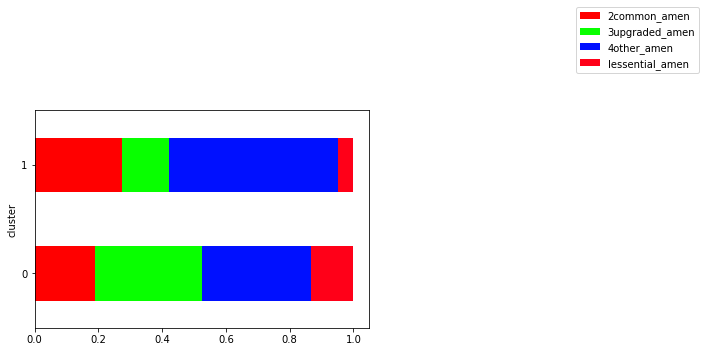

In [195]:
x_final=x_reduce 
from sklearn.cluster import KMeans
x_final.loc[:,'cluster']=KMeans(n_clusters=2).fit_predict(x_final)
pivot_cluster=x_final.pivot_table(index=['cluster'],aggfunc='sum')
pivot_cluster_percentage=pivot_cluster.div(pivot_cluster.sum(axis=1),axis=0)
pivot_cluster_percentage
pivot_cluster_percentage.plot(kind='barh',stacked=True,colormap='hsv')
plt.legend(pivot_cluster_percentage, bbox_to_anchor=(1,0.5,1,1))
x_final=x_final.reset_index()
print(x_final.groupby('cluster')[cols].agg(['mean']))
print(x_final[x_final['id']==y['id'].values[0]])

In [196]:
df2=pd.read_csv('/content/drive/MyDrive/bnb_reviews.csv')
df2=df2[~df2['comments'].isna()]
df2=df2[df2['listing_id'].isin(df_listings['id'])]
df2.to_csv('/content/drive/MyDrive/bnb_reviews.csv')

In [197]:
from nltk.stem.snowball import stopwords
import nltk
nltk.download('stopwords')
all_comments=df2['comments'].values
cmts=''
for c in all_comments:
  c=c.lower()
  cmts+=c+''
for ch in '!@#$%^&*,/\][{}|~`><-_;:':
  cmts=cmts.replace(ch,"")
words=cmts.split()
counts={}
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
for word in words:
  if word not in stopwords:
    counts[word]=counts.get(word,0)+1
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)

items=pd.DataFrame(items)
items=items.rename(columns={0:'Word',1:'Counts'})
items.to_csv('/content/drive/MyDrive/bnb_reviews.csv')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [198]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer=SentimentIntensityAnalyzer()
comments=df2.comments
def calculate_sentiment(comments):
  return(scorer.polarity_scores(comments)['compound'])
df2.loc[:, 'sentiment'] = df2['comments'].apply(lambda x: calculate_sentiment(x))
reviews=df2.copy()
df2=df2[['listing_id','sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [199]:
df2=df2.groupby('listing_id')['sentiment'].agg(['mean']).reset_index()
df2=df2.rename(columns={'mean':'sentiment_score'})

In [200]:
neg=reviews[reviews['sentiment']<0]
neg['comments'].to_csv('/content/drive/MyDrive/bnb_reviews.csv')

In [201]:
print(df2[df2['listing_id']==y['id'].values[0]])
print(df2['sentiment_score'].mean())
print(df2['sentiment_score'].max())
print(df2['sentiment_score'].min())
print(df2['sentiment_score'].std())

    listing_id  sentiment_score
20    14300858         0.637159
0.7133545219244357
0.9897
-0.7372
0.3168903209388234


<function matplotlib.pyplot.show(*args, **kw)>

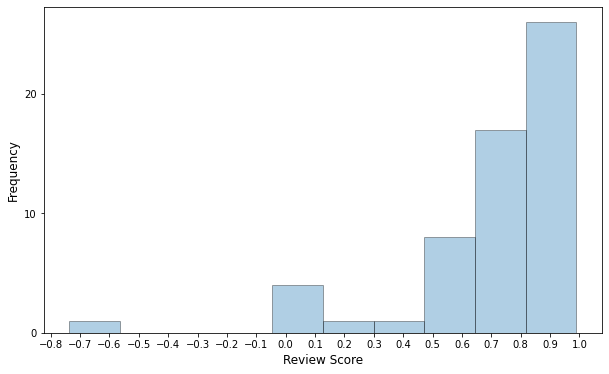

In [202]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(10,6))
plt.hist(df2['sentiment_score'], edgecolor='k', alpha=0.35)
x_major_locator=MultipleLocator(0.1)
y_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Review Score',fontsize=12)
plt.show

In [203]:
df_score=pd.merge(x_final,df2,left_on='id',right_on='listing_id')
df_score

,id,lessential_amen,2common_amen,3upgraded_amen,4other_amen,cluster,listing_id,sentiment_score
0,11289575,3,2,6,6,0,11289575,0.697671
1,22848358,1,2,4,4,0,22848358,0.920700
2,25824341,2,3,1,6,1,25824341,0.795100
3,44201940,0,3,3,6,1,44201940,0.780400
4,20743077,0,2,0,4,1,20743077,0.906133
5,17294145,2,3,1,5,1,17294145,0.655100
6,20204138,3,3,6,6,0,20204138,0.939300
7,41757776,0,4,3,6,1,41757776,0.867600
8,25873414,4,3,7,6,0,25873414,0.989700
9,1706142,2,3,6,6,0,1706142,0.496550


In [204]:
df_score.groupby('cluster')['sentiment_score'].agg(['mean']).reset_index()

,cluster,mean
0,0,0.682328
1,1,0.744381


In [205]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [206]:
Y=df_score['sentiment_score']
X=df_score.drop(columns=['id','listing_id','sentiment_score','cluster'])
X=(X-X.min())/(X.max()-X.min())
X=X.assign(const=1)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        sentiment_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.054
Date:                Wed, 11 Jan 2023   Prob (F-statistic):              0.389
Time:                        21:44:42   Log-Likelihood:                -12.921
No. Observations:                  58   AIC:                             35.84
Df Residuals:                      53   BIC:                             46.15
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
lessential_amen    -0.2286      0.181     

In [207]:
y_index=x_final[x_final['id']==y['id'].values[0]].index
y_=(x_final-x_final.min())/(x_final.max()-x_final.min())
y_=y_.loc[y_index,:]
yp=y_.values[0][1:-1]
yp=np.append(yp,1)
model.predict(yp)

array([0.79112408])

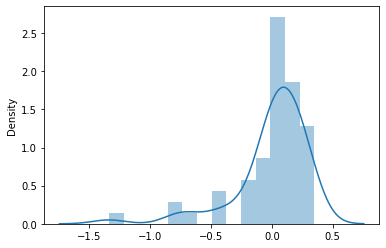

In [208]:
sns.distplot(model.resid)

In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(exog=X.values,exog_idx=i)for i in range(X.shape[1])]
vif_table=pd.DataFrame({'coef_name':X.columns,'vif':np.around(vif,3)})
print(vif_table)

         coef_name     vif
0  lessential_amen   1.919
1     2common_amen   1.484
2   3upgraded_amen   2.041
3      4other_amen   1.763
4            const  12.651


In [210]:
#Price Listing by Neighborhood
df_neighbourhood = pd.DataFrame(df_listings.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False))
df_neighbourhood = df_neighbourhood.rename(columns = {'price': 'mean_price'})
top_10 = df_neighbourhood.index[:10].tolist()
df_neighbourhood.head(10)

,mean_price
neighbourhood_cleansed,
Kensington and Chelsea,69.981481


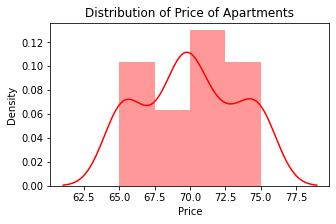

In [211]:
plt.figure(figsize=(5,3))
sns.distplot(df_listings.price,color='r')
plt.xlabel("Price")
plt.title("Distribution of Price of Apartments")
plt.show()